In [24]:
import pandas as pd
import matplotlib.pyplot as plt

filepath = "C:\\Users\\HP\\Downloads\\HR_Data.xlsx"
HR_Data = pd.read_excel(filepath)
HR_Data.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [7]:
#Find the total Number of Employees in the Organisation#

Employees_Count = HR_Data['Employee Number'].count()
print("Total number of employees: ", Employees_Count)

Total number of employees:  1470


In [9]:
#Find the Attrtion Count#
HR_Data['Attrition'] = HR_Data['Attrition'].replace({'Yes': 1, 'No': 0})
HR_Data.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,1,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,0,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,1,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,0,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,0,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [14]:
Attrition_Count = HR_Data['Attrition'].value_counts()[1]
print("Total Attrition Count: ",Attrition_Count)

Total Attrition Count:  237


In [15]:
#Find the attrition rate in percentage#

Attrition_Rate = (Attrition_Count / Employees_Count) * 100

# Print the attrition percentage
print(f'Attrition Rate: {Attrition_Rate}%')

Attrition Rate: 16.122448979591837%


In [17]:
#Find the Active Employees

Active_Employees = (Employees_Count - Attrition_Count)
print("Total number of Active Employees in the company: ",Active_Employees)

Total number of Active Employees in the company:  1233


In [21]:
#Calculate The average Age of Employees

Average_Age = HR_Data['Age'].mean()

# Print the average age
print(f'The Average Age of Employees is: {Average_Age}')

The Average Age of Employees is: 36.923809523809524


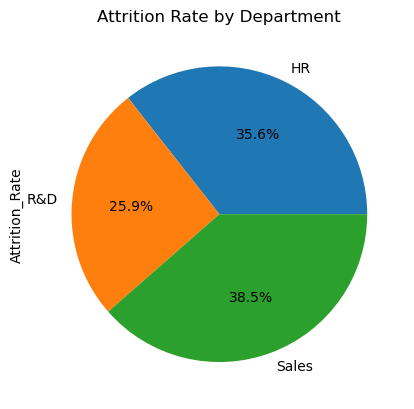

In [25]:
# Create a new DataFrame with the count of employees by department and attrition status
attrition_by_dept = HR_Data.groupby(['Department', 'Attrition']).size().reset_index(name='Counts')

# Create a pivot table with the department as the index, the columns as the attrition status, and the values as the counts
attrition_pivot = pd.pivot_table(attrition_by_dept, values='Counts', index='Department', columns='Attrition')

# Add a column with the total count of employees by department
attrition_pivot['Total'] = attrition_pivot['No'] + attrition_pivot['Yes']

# Add a column with the attrition rate by department
attrition_pivot['Attrition_Rate'] = attrition_pivot['Yes'] / attrition_pivot['Total']

# Plot the attrition rate by department in a pie chart
attrition_pivot['Attrition_Rate'].plot(kind='pie', labels=attrition_pivot.index, autopct='%1.1f%%')
plt.title('Attrition Rate by Department')
plt.show()

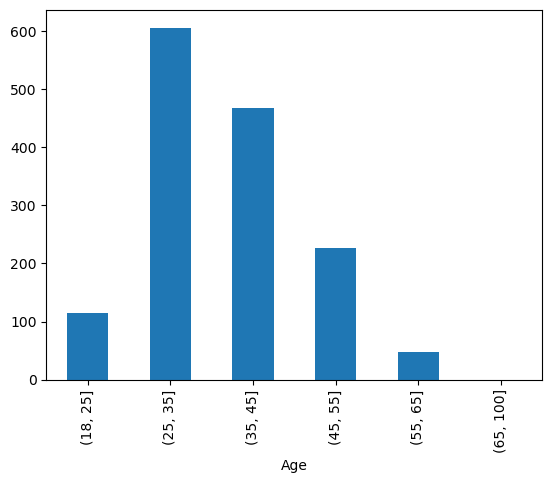

In [27]:
# group employees by age group
Age_groups = HR_Data.groupby(pd.cut(HR_Data['Age'], [18, 25, 35, 45, 55, 65, 100]))['Employee Number'].count()

# plot results in a bar chart
Age_groups.plot(kind='bar')
plt.show()







In [33]:
# group employees by job role and calculate job satisfaction rating and employee count

job_satisfaction = HR_Data.groupby(['Job Role'])['Job Satisfaction'].mean()
employee_count = HR_Data.groupby(['Job Role'])['Employee Count'].sum()

# create a new DataFrame to hold the results
job_data = pd.DataFrame({'Job Satisfaction': job_satisfaction, 'Employee Count': employee_count})

# display the results in a table format
print(job_data)

                           Job Satisfaction  Employee Count
Job Role                                                   
Healthcare Representative          2.786260             131
Human Resources                    2.557692              52
Laboratory Technician              2.691120             259
Manager                            2.705882             102
Manufacturing Director             2.682759             145
Research Director                  2.700000              80
Research Scientist                 2.773973             292
Sales Executive                    2.754601             326
Sales Representative               2.734940              83


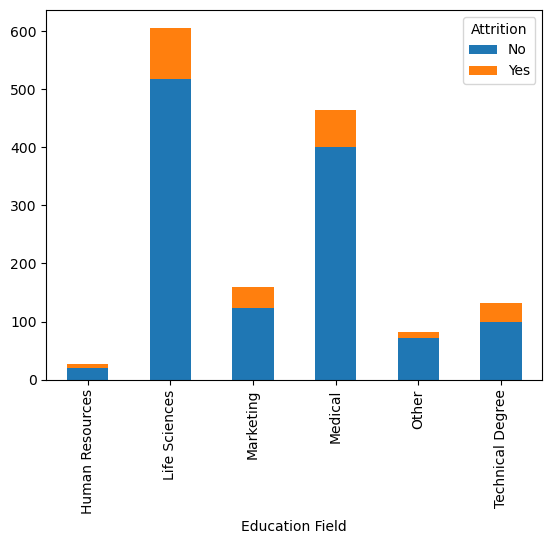

In [39]:
# group data by education field and attrition
Education_attrition = HR_Data.groupby(['Education Field','Attrition'])['Attrition'].count().unstack()

# plot results in a bar chart
Education_attrition.plot(kind='bar', stacked=True)
plt.show()

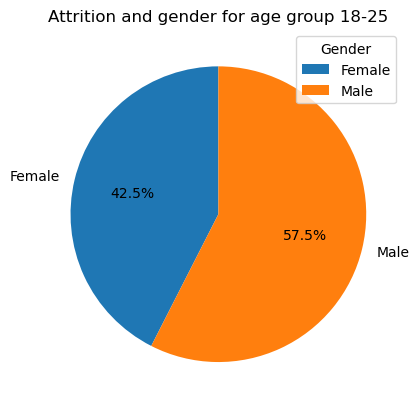

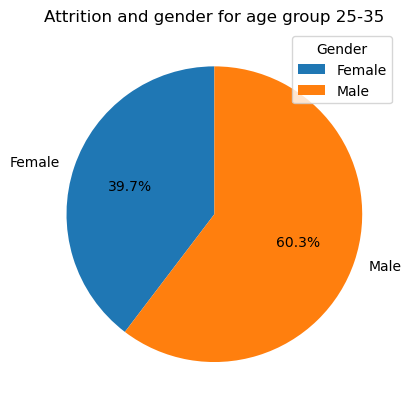

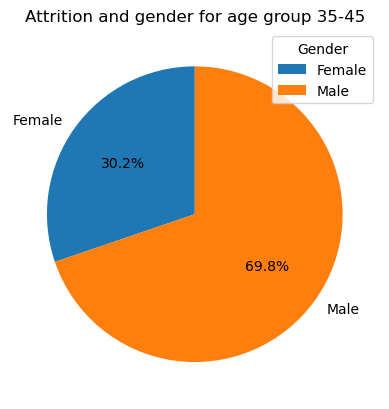

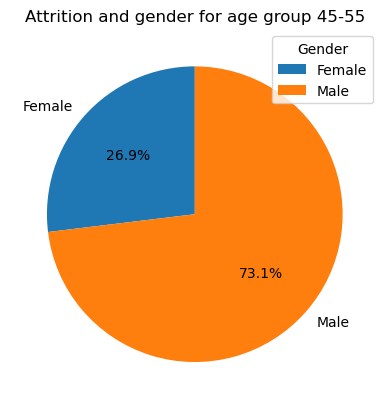

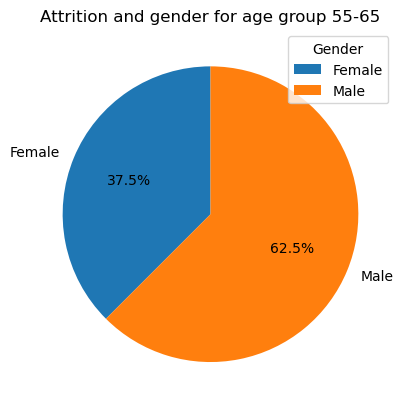

C:\Users\HP\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:3050: RuntimeWarning: invalid value encountered in true_divide
  x = x / sx


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

In [47]:
# group data by gender, age and attrition
Age_GenderRate = HR_Data.groupby(['Gender','Age','Attrition']).size().reset_index(name='Counts')

# Create age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '25-35', '35-45', '45-55', '55-65', '65+']
Age_GenderRate['AgeGroup'] = pd.cut(Age_GenderRate['Age'], bins, labels=labels)

# pivot the data and reshape duplicate entries/index
Age_GenderRate = Age_GenderRate.pivot_table(index=['Gender','AgeGroup'], columns='Attrition', values='Counts', aggfunc='sum').reset_index()

# plot donut chart for each age group
for age_group in labels:
    age_attrition = Age_GenderRate[Age_GenderRate['AgeGroup'] == age_group]
    size = age_attrition['Yes'].sum()
    fig, ax = plt.subplots()
    ax.pie(age_attrition['Yes'], labels=age_attrition['Gender'],autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Attrition and gender for age group {age_group}')
    ax.legend(title='Gender')
    plt.show()